In [1]:
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import math
from scipy.stats import pearsonr


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

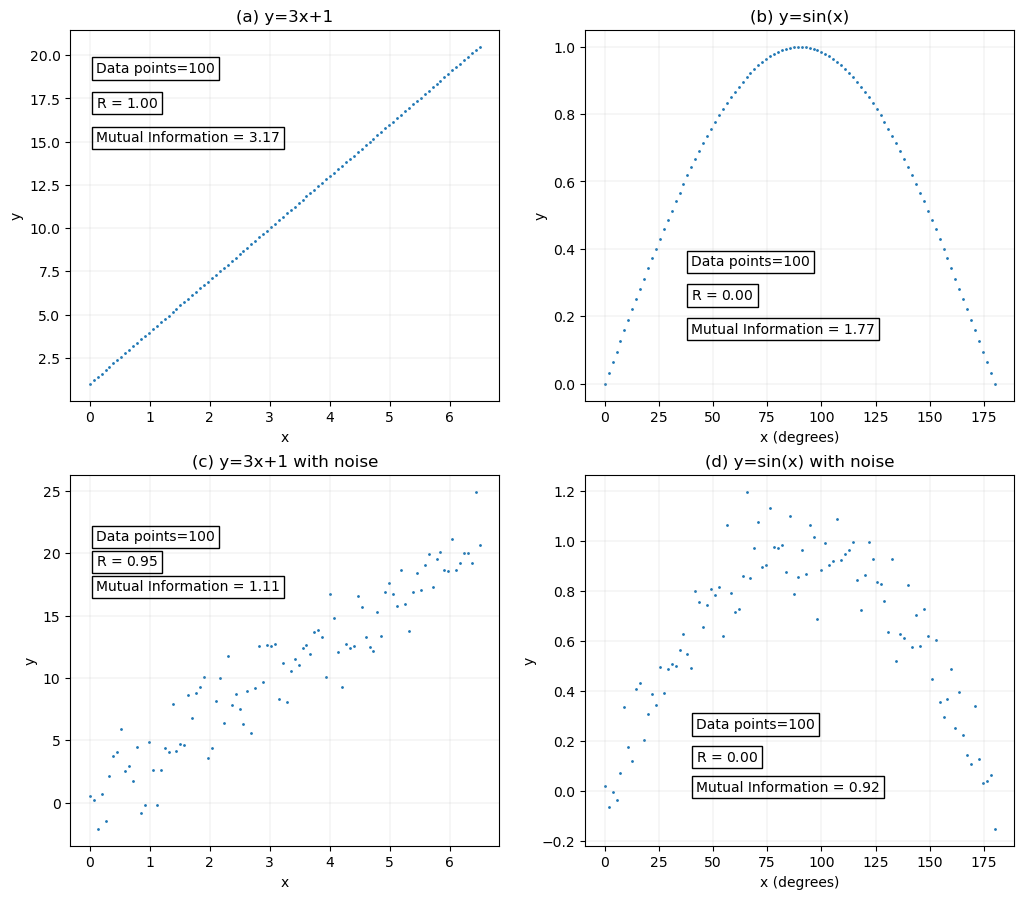

In [2]:
## lets create a linear dataset without any noise

x=np.linspace(0.0,6.5,num=100) ## create x axis point
y=3*x+1   ## equation

line_corr=pearsonr(x,y)[0] ## calculating the pearson correlation coefficient

X=x.reshape(-1,1) ## reshape from (100,) to (100,1). 
Y=y.reshape(-1,1)

MI=mutual_info_regression(X,Y)


#plt.figure(figsize=(5,5))

plt.subplot(2,2,1)

plt.scatter(x,y,s=1)

plt.text(0.1,17, '$\mathrm{R}$ = %3.2f' % (line_corr),fontsize=10,bbox={'facecolor':'none','edgecolor':'black','boxstyle':'square'})
plt.text(0.1,15, 'Mutual Information = %3.2f' % (MI),fontsize=10,bbox={'facecolor':'none','edgecolor':'black','boxstyle':'square'})
plt.text(0.1,19, 'Data points=100',fontsize=10,bbox={'facecolor':'none','edgecolor':'black','boxstyle':'square'})


plt.xlabel('x', fontsize=10)
plt.ylabel('y', fontsize=10)
plt.title("(a) y=3x+1", fontsize=12)
plt.grid(axis='both',linewidth=0.15)



## Lets now create a plot for the sine wave without any noise

a=np.linspace(0,180, num=100) ## the point in the x axis

b=[]
 
for i in range(len(a)):
    b.append(math.sin(math.radians(a[i]))) ## calculation sin(x) in degrees
    
A=a.reshape(-1,1) ## reshape the array
B_initial=np.array(b) ## transform type to array
B=B_initial.reshape(-1,1) ## reshape the array

sin_corr=pearsonr(a,b)[0] ## calculating the pearson correlation coefficient

MI_sin=mutual_info_regression(A,B) ## calculating the mutual information

plt.subplot(2,2,2)

plt.scatter(A,B,s=1)

plt.text(40,0.25, '$\mathrm{R}$ = %3.2f' % (sin_corr),fontsize=10,bbox={'facecolor':'none','edgecolor':'black','boxstyle':'square'})
plt.text(40,0.15, 'Mutual Information = %3.2f' % (MI_sin),fontsize=10,bbox={'facecolor':'none','edgecolor':'black','boxstyle':'square'})
plt.text(40,0.35, 'Data points=100',fontsize=10,bbox={'facecolor':'none','edgecolor':'black','boxstyle':'square'})


plt.xlabel('x (degrees)', fontsize=10)
plt.ylabel('y', fontsize=10)
plt.title("(b) y=sin(x)", fontsize=12)
plt.grid(axis='both',linewidth=0.15)


## lets now add noise to the linear data

x=np.linspace(0.0,6.5,num=100) ## create x axis point

n=np.random.normal(loc=0.0, scale=2.0, size=100) #noise
noise=n.reshape(-1,1)

X=x.reshape(-1,1) ## reshape from (100,) to (100,1). 
Y=3*X+1+noise

XX=X.reshape(-1,) ## reshape to make use in the pearson correlation
YY=Y.reshape(-1,)

line_corr=pearsonr(XX,YY)[0] ## calculating the pearson correlation coefficient
MI=mutual_info_regression(X,Y)

plt.subplot(2,2,3)

plt.scatter(X,Y,s=1)

plt.text(0.1,19, '$\mathrm{R}$ = %3.2f' % (line_corr),fontsize=10,bbox={'facecolor':'none','edgecolor':'black','boxstyle':'square'})
plt.text(0.1,17, 'Mutual Information = %3.2f' % (MI),fontsize=10,bbox={'facecolor':'none','edgecolor':'black','boxstyle':'square'})
plt.text(0.1,21, 'Data points=100',fontsize=10,bbox={'facecolor':'none','edgecolor':'black','boxstyle':'square'})


plt.xlabel('x', fontsize=10)
plt.ylabel('y', fontsize=10)
plt.title("(c) y=3x+1 with noise", fontsize=12)
plt.grid(axis='both',linewidth=0.15)




## Lets now create a plot for the sine wave with noise

a=np.linspace(0,180, num=100) ## the point in the x axis

b=[]
 
for i in range(len(a)):
    b.append(math.sin(math.radians(a[i]))) ## calculation sin(x) in degrees
    

n=np.random.normal(loc=0.0, scale=0.1, size=100) #noise
noise=n.reshape(-1,1)    ## reshape the noise
    

A=a.reshape(-1,1) ## reshape the array
B_initial=np.array(b) ## transform type to array
B=B_initial.reshape(-1,1) ## reshape the array

BB=B+noise

sin_corr=pearsonr(a,b)[0] ## calculating the pearson correlation coefficient

MI_sin=mutual_info_regression(A,BB) ## calculating the mutual information

plt.subplot(2,2,4)

plt.scatter(A,BB,s=1)

plt.text(42,0.12, '$\mathrm{R}$ = %3.2f' % (sin_corr),fontsize=10,bbox={'facecolor':'none','edgecolor':'black','boxstyle':'square'})
plt.text(42,0.0, 'Mutual Information = %3.2f' % (MI_sin),fontsize=10,bbox={'facecolor':'none','edgecolor':'black','boxstyle':'square'})
plt.text(42,0.25, 'Data points=100',fontsize=10,bbox={'facecolor':'none','edgecolor':'black','boxstyle':'square'})


plt.xlabel('x (degrees)', fontsize=10)
plt.ylabel('y', fontsize=10)
plt.title("(d) y=sin(x) with noise", fontsize=12)
plt.grid(axis='both',linewidth=0.15)


plt.subplots_adjust(bottom=1.5, right=1.6, top=3.2)

plt.show()
